In [1]:
import mmdet.apis
import mmdet.registry
import cv2
import mmcv
import matplotlib.pyplot as plt


In [2]:
# 指定模型及其对应的训练模型
config_file = './mmdetection/configs/faster_rcnn/faster_rcnn_r50_fpn_1x_didi.py'

with open('./mmdetection/work_dirs/faster_rcnn_r50_fpn_1x_didi/last_checkpoint', 'rt') as f:
    checkpoint_file = f.read().strip()

In [3]:
# build the model from a config file and a checkpoint file
model = mmdet.apis.init_detector(config_file, checkpoint_file, device='cuda:0')

Loads checkpoint by local backend from path: D:\Study\Computer Science\驭风计划\3 深度学习\DeepLearning\5 滴滴出行_交通场景目标检测\mmdetection\work_dirs\faster_rcnn_r50_fpn_1x_didi\epoch_12.pth


In [11]:
# test a single image
img = './dataset/dataset_release/test/11018.jpg'
img = cv2.imread(img)
img = mmcv.imconvert(img, 'bgr', 'rgb')

result = mmdet.apis.inference_detector(model, img)

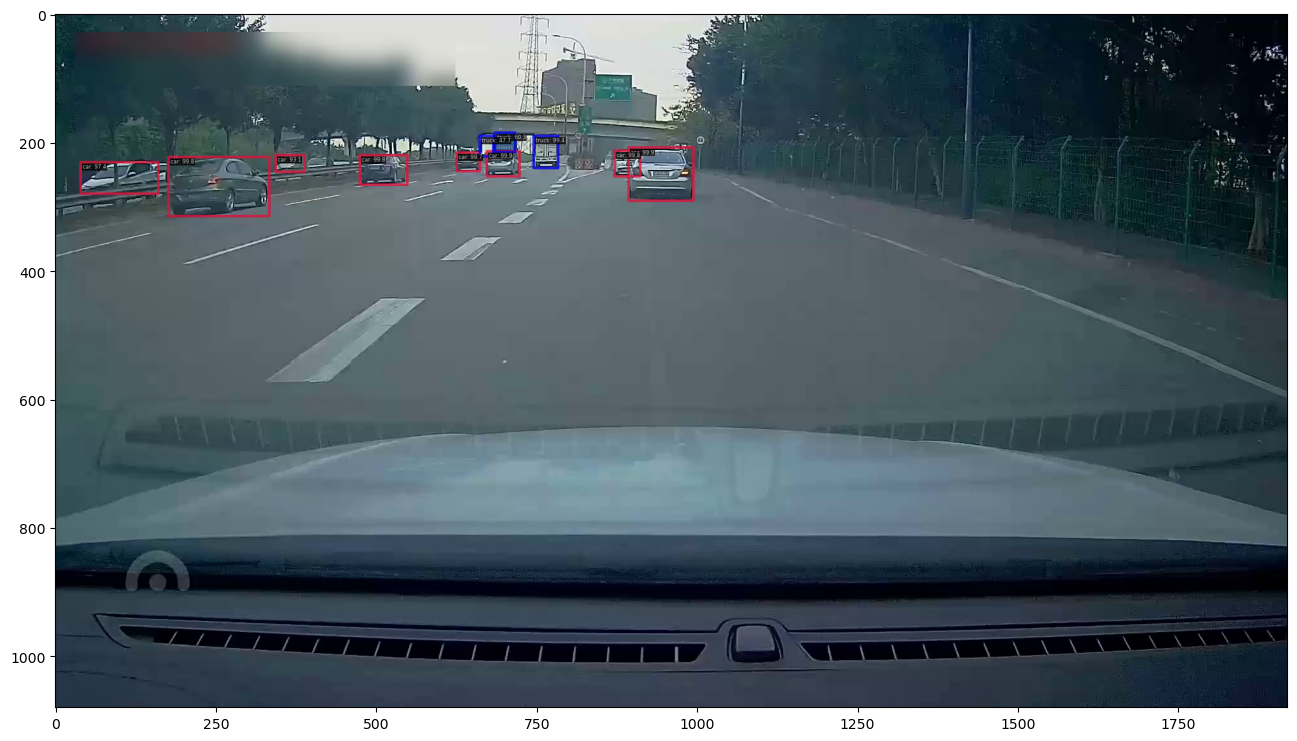

In [12]:
visualizer = mmdet.registry.VISUALIZERS.build(model.cfg.visualizer)
visualizer.dataset_meta = model.dataset_meta
visualizer.add_datasample(
    name='result',
    image=img,
    data_sample=result,
    draw_gt=False,
    pred_score_thr=0.3,
    show=False)

img = visualizer.get_image()

plt.figure(figsize=(16, 9))
plt.imshow(img)
